In [1]:
import hopsworks
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [2]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/213141
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
# retrieve feature groups
traffic_fg = fs.get_feature_group(name='traffic_flow_data', version=1)
weather_fg = fs.get_feature_group(name='weather_data', version=1)

### Process traffic data

In [4]:
# Rerieve data
traffic_fv = fs.get_feature_view(
    name='traffic_trainset',
    version=4,
)

In [5]:
traffic_test = traffic_fv.get_training_data(training_dataset_version=2)

In [6]:
traffic_test = pd.concat([traffic_test[0], traffic_test[1]], axis=1)

In [7]:
# Extract day 29 as a testset
traffic_test  = traffic_test[(traffic_test['day']==29)]

In [8]:
# Make a segment of traffic data every hour (use the first data per hour)
columns = ['free_flow_speed', 'confidence', 'weekend', 'day', 'hour', 'current_speed']
traffic_test_new = pd.DataFrame(columns=columns)
for hour in range(24):
    first_data_per_hour = traffic_test[(traffic_test['hour']==hour)].iloc[0]
    new_data = {}
    for column in columns:
        new_data[f'{column}']=first_data_per_hour[f'{column}']
    traffic_test_new.loc[len(traffic_test_new)] = new_data

traffic_test_new

,free_flow_speed,confidence,weekend,day,hour,current_speed
0,36,1.000000,False,29,0,36
1,36,1.000000,False,29,1,36
2,36,1.000000,False,29,2,36
3,36,1.000000,False,29,3,36
4,36,1.000000,False,29,4,36
5,36,1.000000,False,29,5,36
6,36,1.000000,False,29,6,36
7,36,0.990000,False,29,7,25
8,36,0.991387,False,29,8,27
9,36,0.994600,False,29,9,25


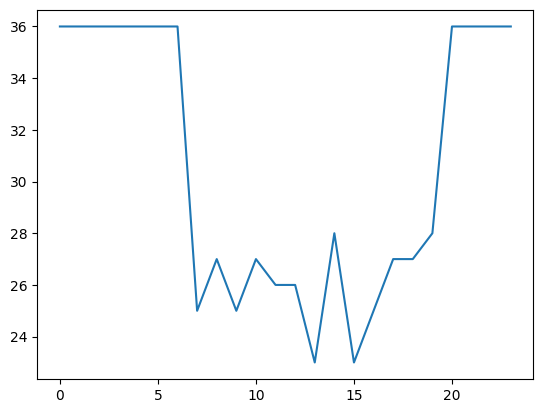

In [9]:
# from matplotlib import pyplot 
# x = traffic_test_new['current_speed']

# pyplot.plot(x)
# pyplot.show()

In [10]:
# Save the traffic testset as a csv file
traffic_test_new.to_csv('traffic_testset.csv', index=False)

### Process weather data

In [4]:
# Retrieve data
query = weather_fg.select_all()
try:
    weather_fv = fs.get_feature_view(name='weather_trainset', version=2)
except:
    weather_fv = fs.get_or_create_feature_view(
        name='weather_trainset',
        query=query,
        version=2
    )

In [14]:
# Create training set
try:
    weather_test = weather_fv.get_training_data(training_dataset_version=1)[0]
except:
    weather_fv.create_training_data()

In [18]:
weather_test = pd.read_csv('weather_trainset.csv')

In [19]:
# Extract day 29 as a testset
weather_test  = weather_test[(weather_test['day']==28)]

In [20]:
weather_test = weather_test.reset_index(drop=True)

In [21]:
weather_test

,day,hour,temp,wd,ws,prec1h,frsn1h,vis
0,28,0,-6.0,229,0.8,0.0,0.0,61.8
1,28,1,-5.9,246,1.6,0.0,0.0,58.7
2,28,2,-6.0,176,1.0,0.0,0.0,61.6
3,28,3,-5.9,164,1.5,0.0,0.0,59.3
4,28,4,-5.4,144,1.8,0.0,0.0,51.5
5,28,5,-4.8,116,2.1,0.0,0.0,52.0
6,28,6,-4.0,133,1.7,0.0,0.0,48.9
7,28,7,-3.1,139,2.3,0.0,0.0,41.6
8,28,8,-1.7,126,3.3,0.3,0.4,2.9
9,28,9,-1.2,126,4.7,0.5,0.6,14.2


In [23]:
# Save the weatehr testset as a csv file
weather_test.to_csv('weather_testset.csv', index=False)

In [24]:
hopsworks.logout()

Connection closed.
